In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

## Reading the data

In [2]:
df = pd.read_csv('../dic-project/data/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Cleaning

### 1)Removing unncessary columns

- url has name of restaurant and location. We also have a name column and location columns. so we can drop url
- review list has rating and customers reviews. we have a separate column for restaurant rating so we can drop review list column
- phone number column is also redundant for our project
- dishes liked is also not necessary for our predictions. we will base our predictions mainly on cusines, locatrion,rating.
- DECISION PENDING listed_in(city) has different locations. since we already have locations, listed_in(city) is redundant

In [6]:
df = df.drop(['url', 'address', 'phone',  'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


### Adding new feature called No of items which tells the number of items in the menu and dropping menu column

In [7]:
def update_menu_items_number(menu):
    menu=menu.strip('[]').split(',')
    
    if len(menu)==1:
        if menu[0]=='':
            return 0
            
    return len(menu)
    
df['no_of_items'] = df['menu_item'].apply(update_menu_items_number)


In [48]:
df['no_of_items'].value_counts()
df.drop(['menu_item'],axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,no_of_items
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari,0


In [9]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city),no_of_items
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari,0
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari,0


### 2)changing columns names

In [10]:
df.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type","listed_in(city)":"city"},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item,type,city,no_of_items
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari,0
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari,0


### 3) removing duplicates

In [11]:
df.drop_duplicates(inplace = True)
df.shape

(51630, 13)

## 4) Removing null values

In [12]:
df.dropna(inplace = True)

## 5)exploring rate column

In [13]:
df['rate'].unique()
# if rating is NEW or - we assume its a new 

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

- if rating is new or - we replcae it with null
- remove '/5' and converting to float

In [14]:
def update_ratings(rating):
    if(rating=='NEW' or rating=='-'):
        return np.nan
    else:
        rating = str(rating).split('/')[0]
        return float(rating)
    
df['rate'] = df['rate'].apply(update_ratings)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

## checking if all rates are within 0-5 
##### Outlier checking

In [15]:
print(df['rate'].min())
print(df['rate'].max())

1.8
4.9


## 4) Removing null values

In [16]:
df.dropna(inplace = True)

## 6)changing cost column to float data type

- cost is of object data type. We convert it to float, by removing commas

In [17]:
df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [18]:
# replce comma with empty string in cost column
df["cost"]=df["cost"].astype(str).apply(lambda x: x.replace(",","")).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41205 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41205 non-null  object 
 1   online_order  41205 non-null  object 
 2   book_table    41205 non-null  object 
 3   rate          41205 non-null  float64
 4   votes         41205 non-null  int64  
 5   location      41205 non-null  object 
 6   rest_type     41205 non-null  object 
 7   cuisines      41205 non-null  object 
 8   cost          41205 non-null  float64
 9   menu_item     41205 non-null  object 
 10  type          41205 non-null  object 
 11  city          41205 non-null  object 
 12  no_of_items   41205 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 4.4+ MB


## cheking for outliers in cost

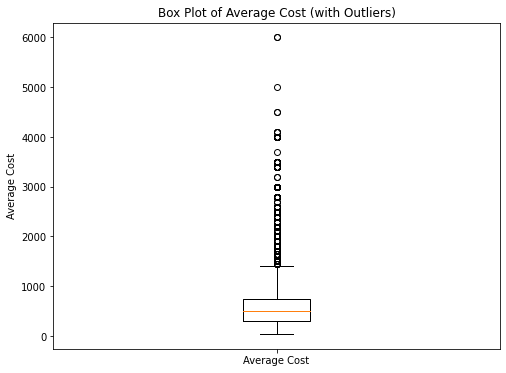

In [19]:


# Calculate the IQR (Interquartile Range)
Q1 = df['cost'].quantile(0.25)
Q3 = df['cost'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['cost'] < lower_bound) | (df['cost'] > upper_bound)]


# Create a box plot to visualize the outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['cost'])
plt.title("Box Plot of Average Cost (with Outliers)")
plt.ylabel("Average Cost")
plt.xticks([1], ['Average Cost'])
plt.show()


In [20]:
print(df['cost'].min())
print(df['cost'].max())

40.0
6000.0


## 7) checking on location column

In [21]:
location_counts=df['location'].value_counts()


##### If a particular location has less than 100 restaurant, we will change he location to 'others'

In [22]:
def update_location(location):
    if location_counts[location]<300:
        return "others"
    else:
        return str(location)
    
df['location'] = df['location'].apply(update_location)
    

## 8) checking restaurant type (rest_type)

In [23]:
rest_type_counts=df['rest_type'].value_counts()


##### If there are less than 100 restaurants of a particular type we will put that restaurant's rest_type as 'others'

In [24]:
def update_rest_type(rest_type):
    if rest_type_counts[rest_type]<100:
        return "others"
    else:
        return str(rest_type)
    
df['rest_type'] = df['rest_type'].apply(update_rest_type)

## 9) Checking cuisines columns

In [25]:
cuisines_count=df['cuisines'].value_counts()
print(cuisines_count)

cuisines
North Indian                                2107
North Indian, Chinese                       1949
South Indian                                1231
Cafe                                         620
Bakery, Desserts                             613
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2367, dtype: int64


##### if a particular cuisine type has less than 100 restaurant, then we change the cuisine type as others

In [26]:
def update_cuisines(cuisine):
    if cuisines_count[cuisine]<100:
        return "others"
    
    else:
        return str(cuisine)
    
df['cuisines']=df['cuisines'].apply(update_cuisines)

# EDA

In [27]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item,type,city,no_of_items
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,[],Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,[],Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",others,800.0,[],Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,[],Buffet,Banashankari,0


## 1)Count plot of various locations

C:\Temp\ipykernel_1552\1595557934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['location'], palette="Set1",order=df['location'].value_counts().index)


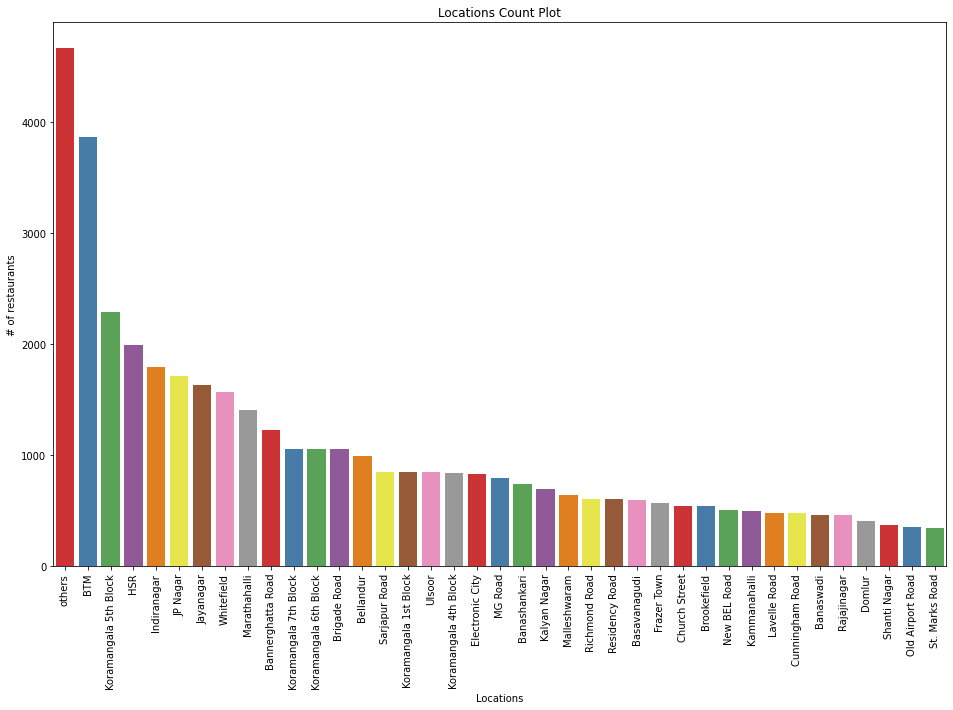

In [28]:
# Create a count plot
plt.figure(figsize = (16,10))
# plt.style.use('dark_background')
sns.countplot(x=df['location'], palette="Set1",order=df['location'].value_counts().index)

# Set labels and title

plt.xlabel("Locations")
plt.ylabel("# of restaurants")
plt.title("Locations Count Plot")
plt.xticks(rotation=90)

# Show the plot

plt.show()

## 2)count plot of cuisine type

C:\Temp\ipykernel_1552\2953118006.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_cuisines_data, palette="Set1",order=filtered_cuisines_data.value_counts().index)


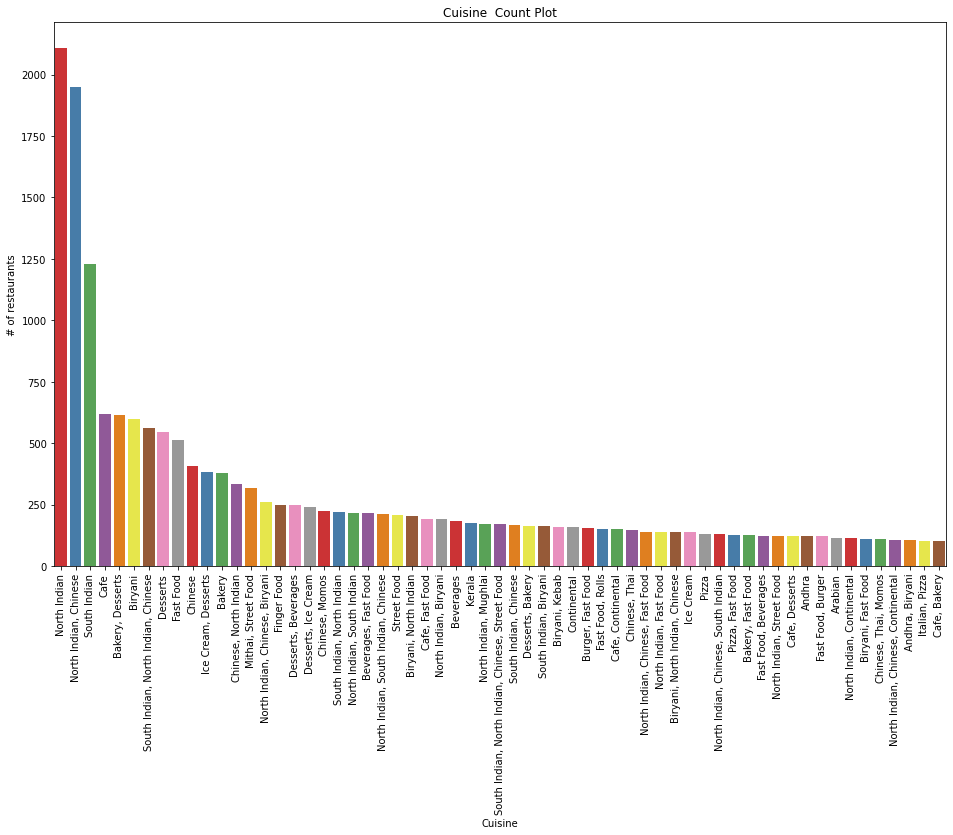

In [29]:
# Exclude a cuisines category others 
cuisines_data=df['cuisines']
filtered_cuisines_data = cuisines_data[cuisines_data != "others"]


# Create a count plot
plt.figure(figsize = (16,10))
sns.countplot(x=filtered_cuisines_data, palette="Set1",order=filtered_cuisines_data.value_counts().index)

# Set labels and title
plt.xlabel("Cuisine")
plt.ylabel("# of restaurants")
plt.title("Cuisine  Count Plot")
plt.xticks(rotation=90)

# # Show the plot
# plt.style.use('dark_background')
plt.show()

## 3) Count plot of online_order

C:\Temp\ipykernel_1552\1421130603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='online_order',palette="Set2" )


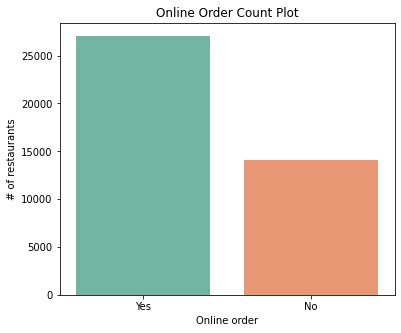

In [30]:
# Create a count plot
plt.figure(figsize = (6,5))
sns.countplot(data=df,x='online_order',palette="Set2" )

# Set labels and title
plt.xlabel("Online order")
plt.ylabel("# of restaurants")
plt.title("Online Order Count Plot")

# Show the plot
plt.show()

## pie plot of online orders

Text(0.5, 1.0, 'Online Order Pie Chart')

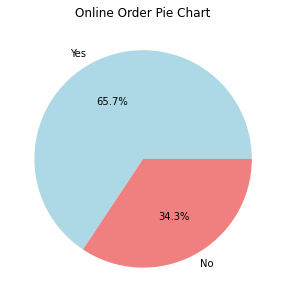

In [31]:
# Calculate the counts of each category
counts = df['online_order'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Online Order Pie Chart")

## 4) Count plot of book_table

C:\Temp\ipykernel_1552\692090319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['book_table'], palette="Set2")


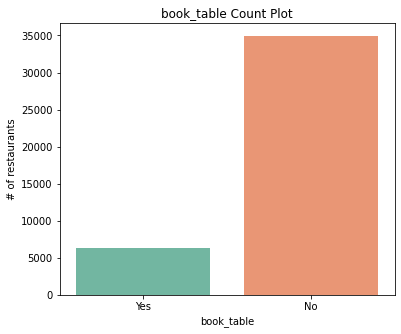

In [32]:
# Create a count plot
plt.figure(figsize = (6,5))
sns.countplot(x=df['book_table'], palette="Set2")

# Set labels and title
plt.xlabel("book_table")
plt.ylabel("# of restaurants")
plt.title("book_table Count Plot")

# Show the plot
plt.show()

## 5) count plot of type

C:\Temp\ipykernel_1552\607995992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['type'], palette="Set2")


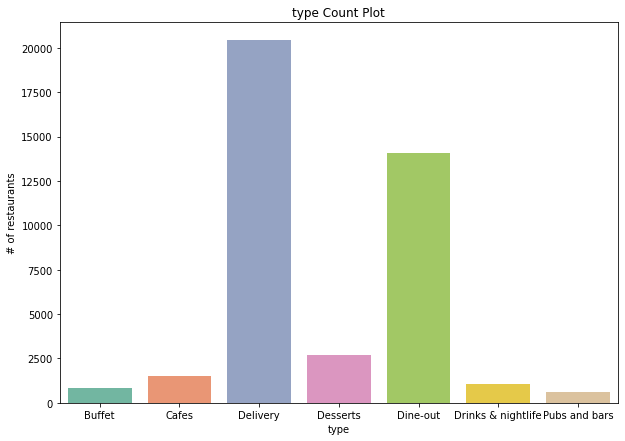

In [33]:
# Create a count plot
plt.figure(figsize = (10,7))
sns.countplot(x=df['type'], palette="Set2")

# Set labels and title
plt.xlabel("type")
plt.ylabel("# of restaurants")
plt.title("type Count Plot")


# Show the plot
plt.show()

## Rate vs type

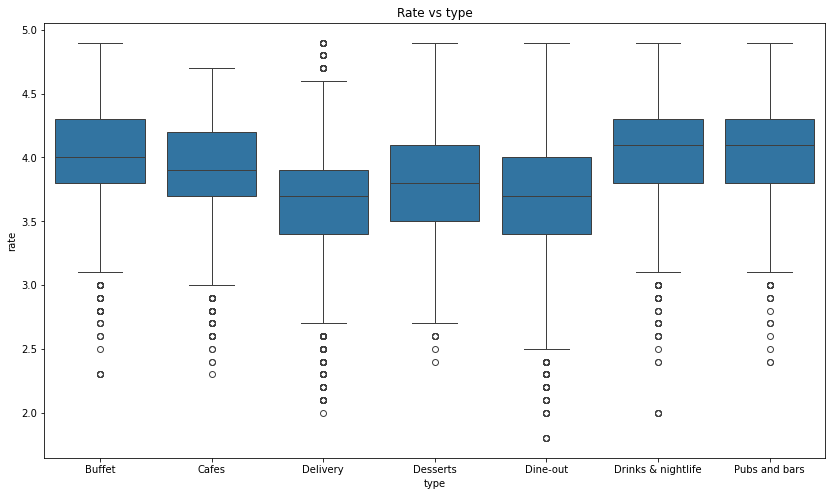

In [34]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'type', y = 'rate', data = df)
plt.title('Rate vs type')
plt.show()

## 6)Rate vs online order

C:\Temp\ipykernel_1552\182898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['online_order'], y = df['rate'],palette="Set2")


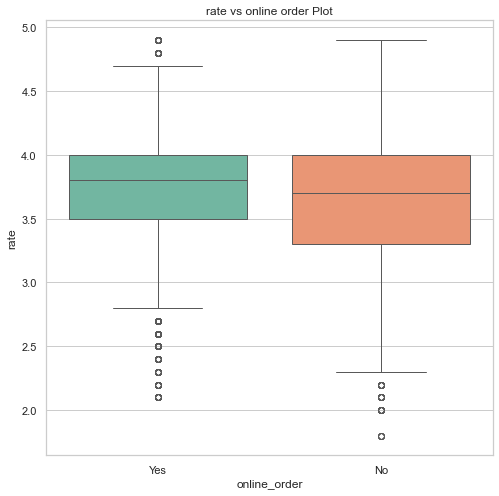

In [35]:
plt.figure(figsize = (8,8))
sns.set(style="whitegrid")
sns.boxplot(x = df['online_order'], y = df['rate'],palette="Set2")

# medians = df.groupby('online_order')['rate'].mean()
# print(medians)
# for xtick, median in enumerate(medians):
#     plt.text(xtick, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='semibold')


plt.title("rate vs online order Plot")
plt.show()

## 7)Rate vs book_table

C:\Temp\ipykernel_1552\523843544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['book_table'], y = df['rate'],palette="Set2")


Text(0.5, 1.0, 'rate vs book_table Plot')

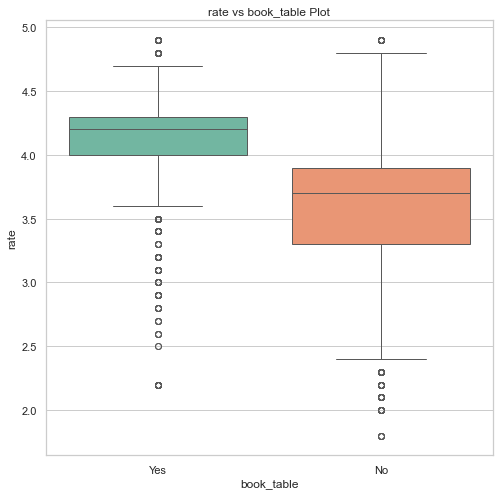

In [36]:
plt.figure(figsize = (8,8))
sns.set(style="whitegrid")
sns.boxplot(x = df['book_table'], y = df['rate'],palette="Set2")

# medians = df.groupby('book_table')['rate'].mean()
# print(medians)
# for xtick, median in enumerate(medians):
#     plt.text(xtick, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='semibold')

plt.title("rate vs book_table Plot")

## 8) Count of restaurants based on location and online order

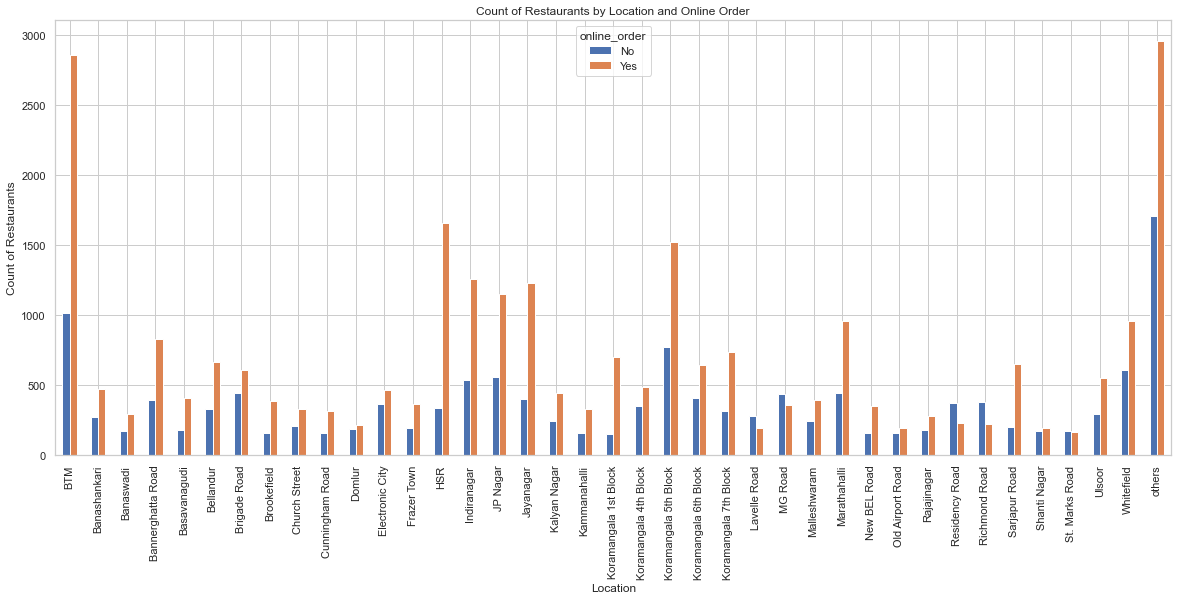

In [37]:
# Create a pivot table
df1 = df.pivot_table(index='location', columns='online_order', values='name', aggfunc='count', fill_value=0)

# Plot the bar chart
df1.plot(kind='bar', figsize=(20, 8))
plt.title("Count of Restaurants by Location and Online Order")
plt.xlabel("Location")
plt.ylabel("Count of Restaurants")
plt.show()

## avg cost of restaurant based on location

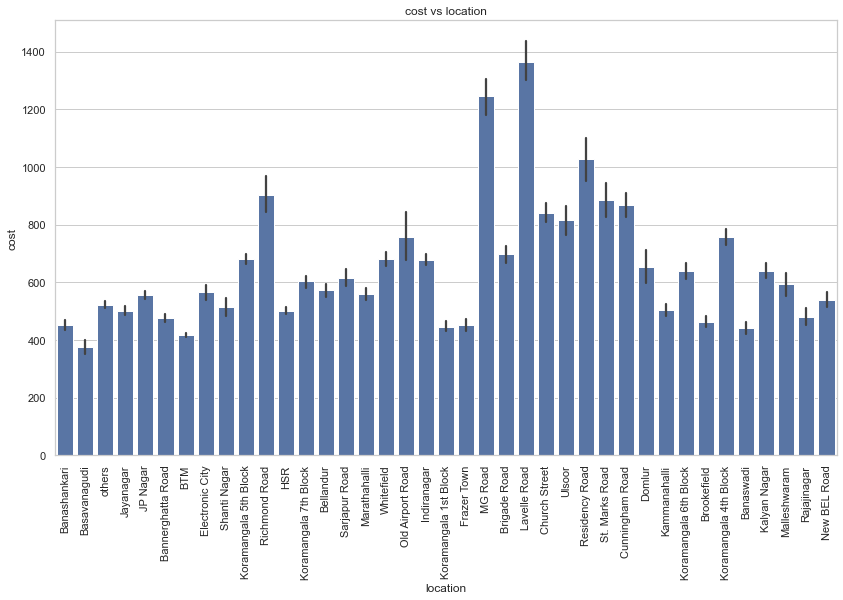

In [38]:
plt.figure(figsize = (14, 8))
sns.barplot(x = 'location', y = 'cost', data = df)

plt.title('cost vs location')
plt.xticks(rotation = 90)
plt.show()

## avg cost of restaurant based on location and order type

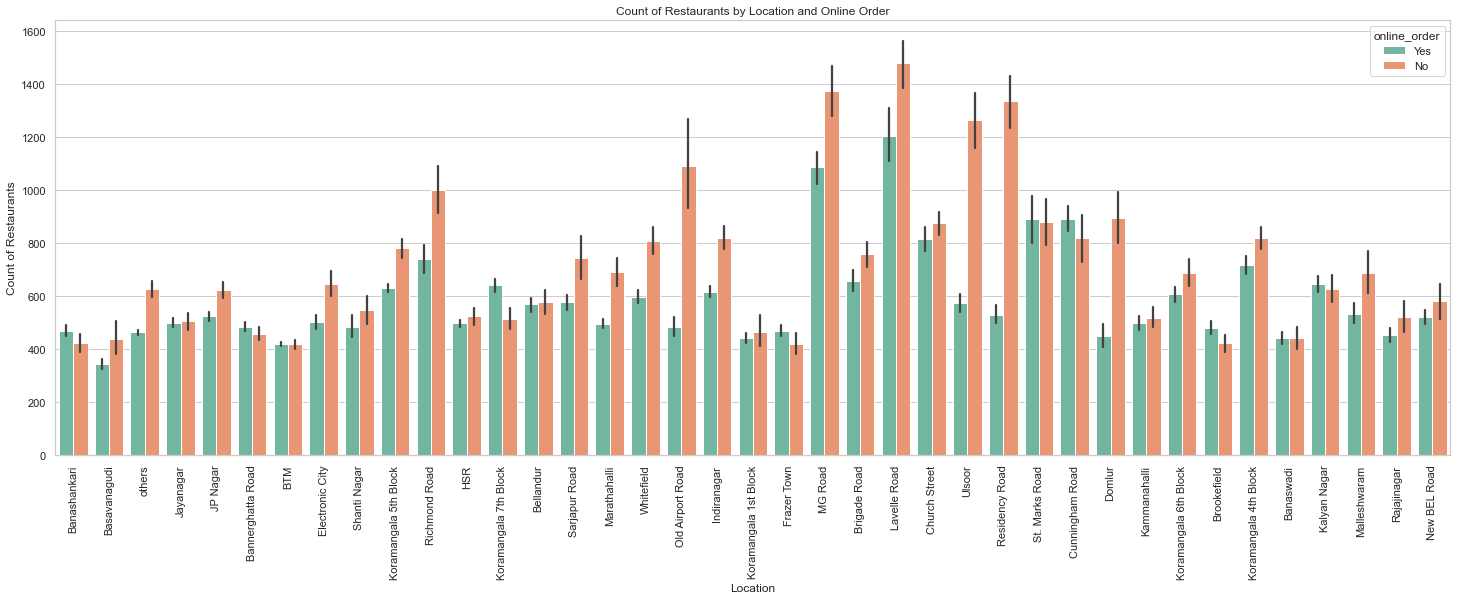

In [39]:
plt.figure(figsize = (25, 8))
sns.barplot(x = 'location', y = 'cost',hue='online_order', data = df,palette='Set2')

plt.title("Count of Restaurants by Location and Online Order")
plt.xlabel("Location")
plt.ylabel("Count of Restaurants")
plt.xticks(rotation = 90)
plt.show()

## 9) avg rating of restaraunts based on location and online order

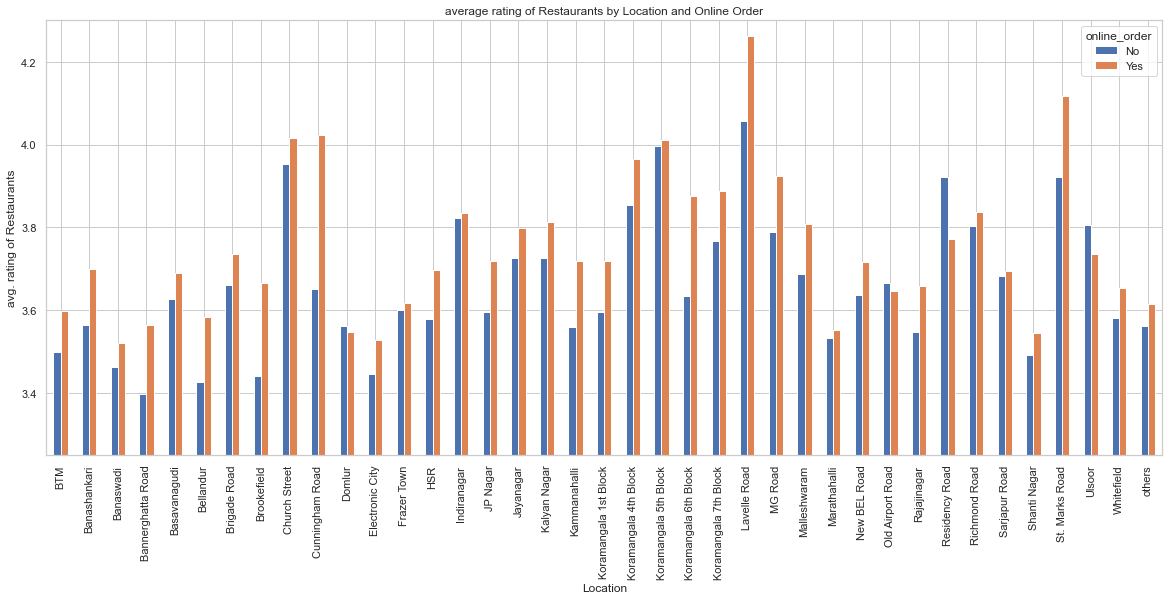

In [40]:
# Create a pivot table
df1 = df.pivot_table(index='location', columns='online_order', values='rate', aggfunc='mean', fill_value=0)
# print(df1)

# Plot the bar chart
ax=df1.plot(kind='bar', figsize=(20, 8))
plt.title("average rating of Restaurants by Location and Online Order")
plt.xlabel("Location")
plt.ylabel("avg. rating of Restaurants")
ax.set_ylim(3.25, 4.3)
plt.show()

## SAME AS ABOVE  9)avg rating of restaurants based on location and online order

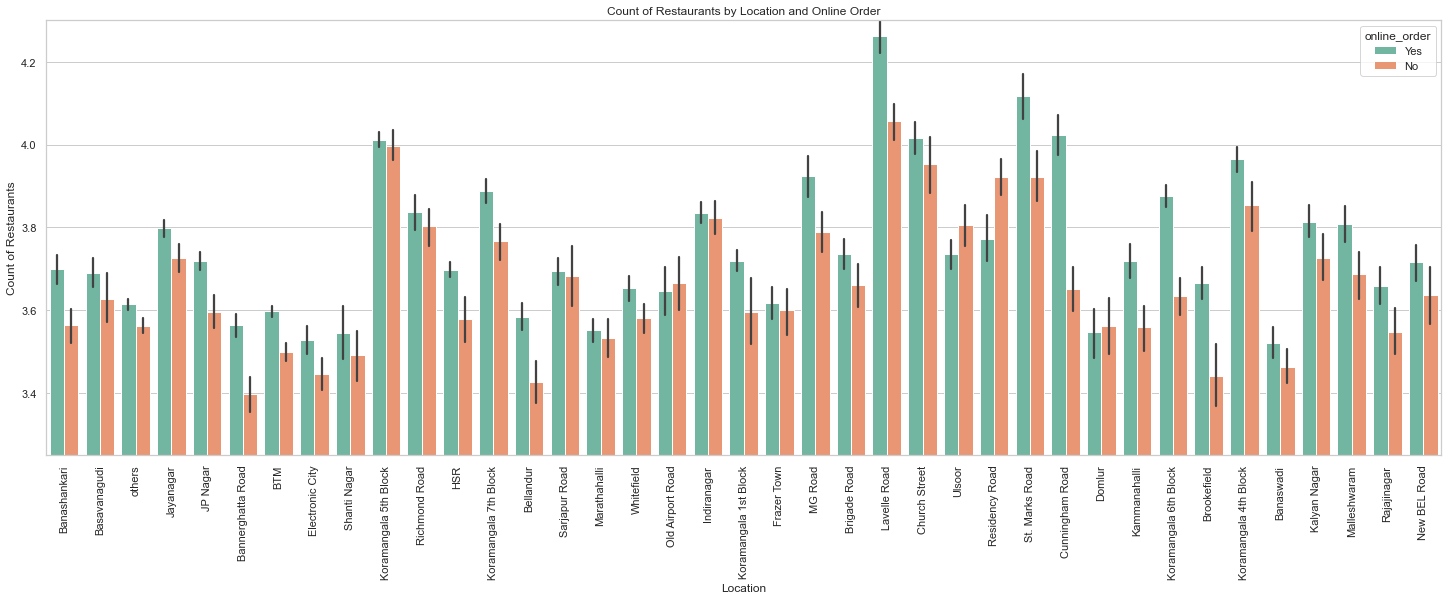

In [41]:
plt.figure(figsize = (25, 8))
ax=sns.barplot(x = 'location', y = 'rate',hue='online_order', data = df,palette='Set2')

plt.title("Count of Restaurants by Location and Online Order")
plt.xlabel("Location")
plt.ylabel("Count of Restaurants")
plt.xticks(rotation = 90)
ax.set_ylim(3.25, 4.3)
plt.show()

## 11)displot for rating

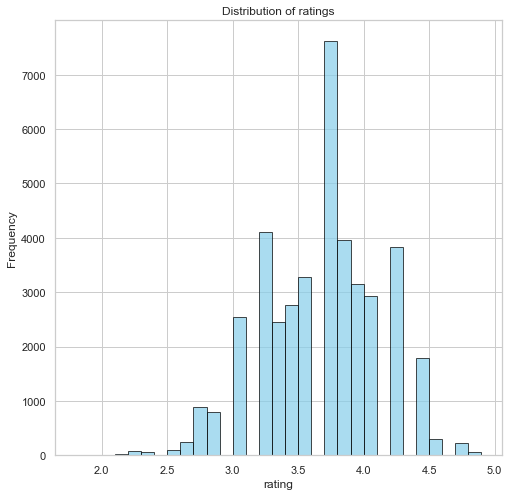

In [42]:
plt.figure(figsize=(8, 8))
plt.hist(df['rate'], bins=df['rate'].nunique(), color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of ratings")
plt.xlabel("rating")
plt.ylabel("Frequency")

# Show the plot
plt.show()

## treemap of number of restaurants in each location

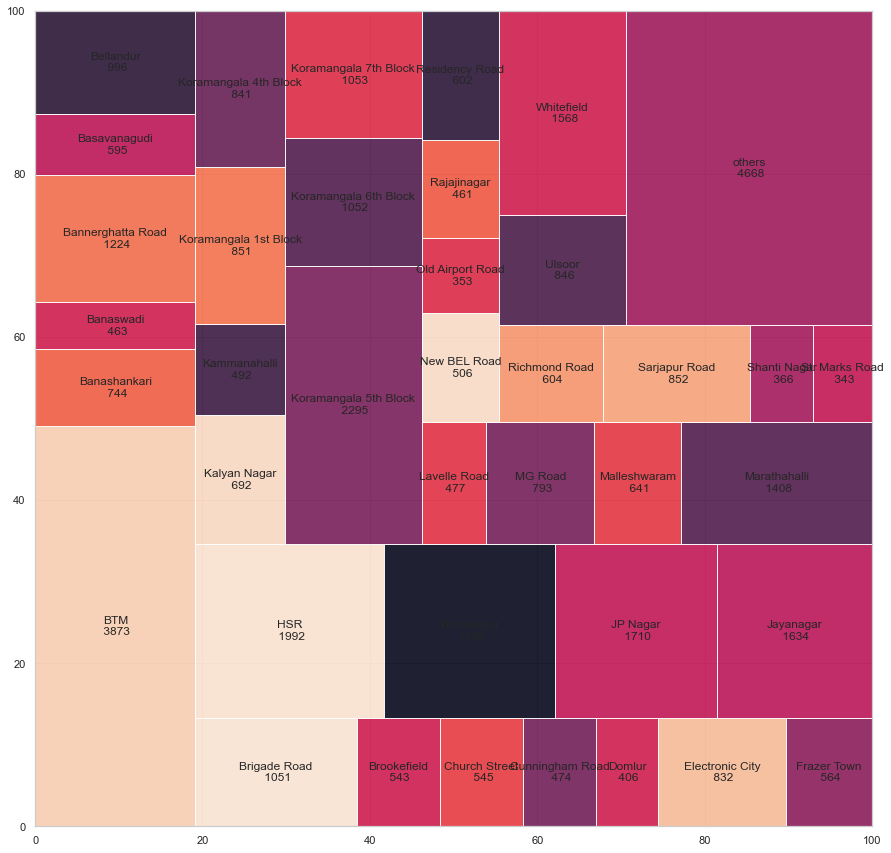

In [43]:

count_of_rest_in_location =df.groupby('location')[['name']].count().reset_index().name.values.tolist()

list_of_locations=df.groupby('location')[['name']].count().index.tolist()

list_label=[location+"\n "+str(count_of_rest) for location,count_of_rest in zip(list_of_locations,count_of_rest_in_location)]
# int_list = [int(item) for item in count_of_rest_in_location]

plt.figure(figsize=(15, 15))
squarify.plot(sizes=count_of_rest_in_location, label=list_label, alpha=.9)
plt.show()

# dummy

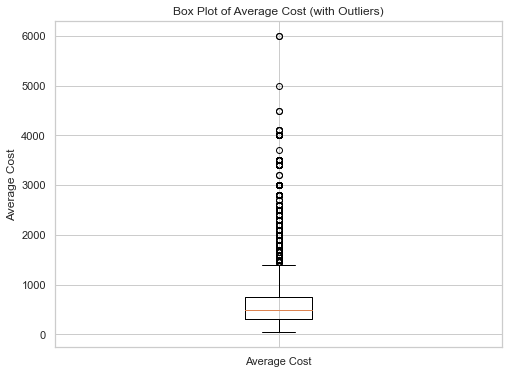

In [44]:


# Calculate the IQR (Interquartile Range)
Q1 = df['cost'].quantile(0.25)
Q3 = df['cost'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['cost'] < lower_bound) | (df['cost'] > upper_bound)]


# Create a box plot to visualize the outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['cost'])
plt.title("Box Plot of Average Cost (with Outliers)")
plt.ylabel("Average Cost")
plt.xticks([1], ['Average Cost'])
plt.show()


In [45]:
min_value = df['cost'].min()
max_value = df['cost'].max()

print(min_value)

print(max_value)

40.0
6000.0


Outliers:
Series([], Name: rate, dtype: float64)


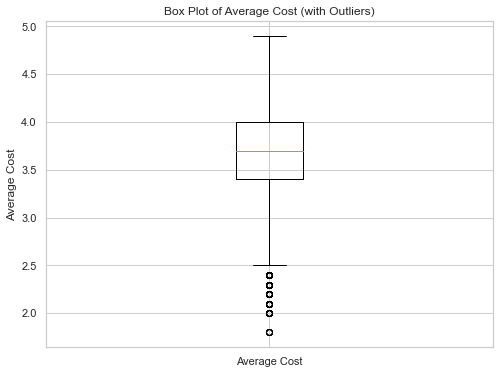

In [46]:


# Calculate the IQR (Interquartile Range)
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = 0
upper_bound = 5

# Find outliers
outliers = df[(df['rate'] < lower_bound) | (df['rate'] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers['rate'])

# Create a box plot to visualize the outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['rate'])
plt.title("Box Plot of Average Cost (with Outliers)")
plt.ylabel("Average Cost")
plt.xticks([1], ['Average Cost'])
plt.show()


In [47]:

sns.heatmap(df.corr(), annot=True)
plt.show()



ValueError: could not convert string to float: 'Jalsa'